In [166]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
geo = Nominatim(user_agent = 'MyApp')

datos = gpd.read_file('/barrios.csv')

datos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   WKT        48 non-null     object  
 1   BARRIO     48 non-null     object  
 2   COMUNA     48 non-null     object  
 3   PERIMETRO  48 non-null     object  
 4   AREA       48 non-null     object  
 5   OBJETO     48 non-null     object  
 6   geometry   48 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 2.8+ KB


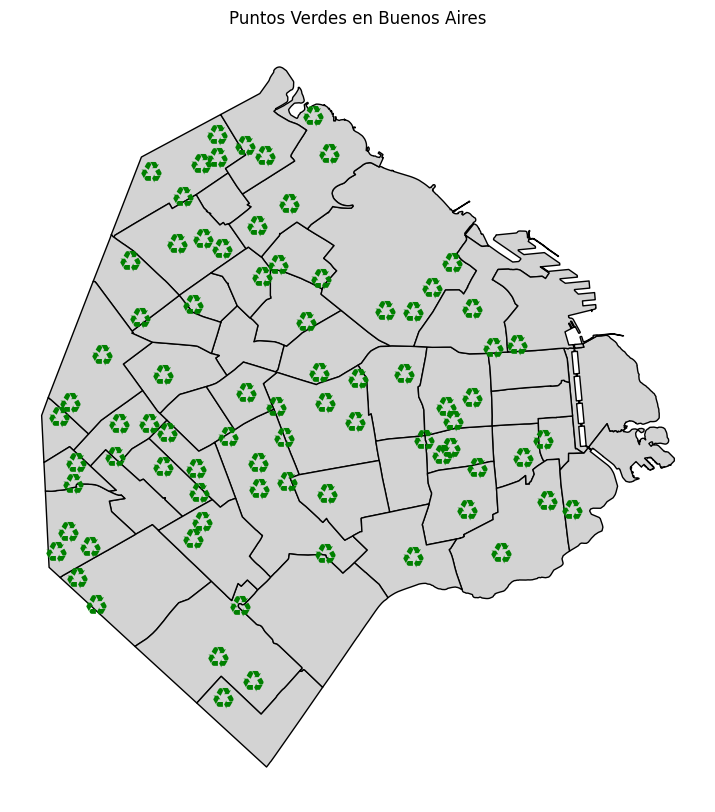

In [90]:
# Grafico
barrios = gpd.read_file('/barrios.csv')

datos = gpd.read_file('/puntos-verdes.csv')

gdf = gpd.GeoDataFrame(datos, geometry='geometry', crs="EPSG:4326")

ax = barrios.plot(color='lightgrey', edgecolor='black', figsize=(10, 10))

gdf.plot(ax=ax, markersize=0)

for idx, row in gdf.iterrows():

    ax.text(row.geometry.x, row.geometry.y, '♻️', color='green', fontsize=20, ha='center', va='center')

ax.axis('off')

plt.title('Puntos Verdes en Buenos Aires')

plt.show()


In [163]:
mi_loc = geo.geocode('Las Heras y Pueyrredon')

In [134]:
#Función hecha por CHATGPT para calcular distancias entre lugares
from math import radians, sin, cos, sqrt, atan2

def distancia_haversine(loc1, lat2, lon2):
    """
    Calcula la distancia en kilómetros entre dos puntos geográficos
    utilizando la fórmula de Haversine.
    """
    # Radio de la Tierra en kilómetros
    radio_tierra = 6371.0

    # Convertir coordenadas de grados a radianes
    lat1 = radians(loc1.latitude)
    lon1 = radians(loc1.longitude)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Diferencia de latitud y longitud
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calcular la distancia utilizando la fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distancia = radio_tierra * c

    return distancia

In [160]:
# Funcion que encuentra el punto verde mas cercano
def encontrar(gdf, mi_loc):
    distancia_minima = float('inf')
    punto_verde_mas_cercano = None

    for idx, row in gdf.iterrows():
        distancia = distancia_haversine(mi_loc, row.geometry.y, row.geometry.x)
        if distancia < distancia_minima:
            distancia_minima = distancia
            punto_verde_mas_cercano = row

    return punto_verde_mas_cercano, distancia_minima

In [147]:
#Crea una URL para mostrar como llegar en google maps al punto verde mas cercano
def direccion_maps(origen, destino):
  direccion = str(destino.nombre)
  direccion_mas = direccion.replace(' ','+')
  url = f'https://www.google.com/maps/dir/{origen.latitude},{origen.longitude}/{direccion_mas}/'

  return url



In [181]:
ubicacion = input('Ingrese su ubicación actual: ')
mi_loc = geo.geocode(ubicacion)
print(mi_loc)
punto_verde_mas_cercano, distancia_minima = encontrar(gdf, mi_loc)
url = direccion_maps(mi_loc, punto_verde_mas_cercano)


if distancia_minima > 100:
  print('El punto verde está muy lejos (más de 100km)')
else:
  print(f"""
El punto verde más cercano a tu ubicación está a {distancia_minima} en {punto_verde_mas_cercano.nombre}.
Está abierto de {punto_verde_mas_cercano.dia_hora}
La forma para llegar es: {url}
""")

Ingrese su ubicación actual: La Bombonera


La Bombonera, 805, Brandsen, La Boca, Buenos Aires, Distrito de Las Artes, Comuna 4, Ciudad Autónoma de Buenos Aires, C1161AAQ, Argentina

El punto verde más cercano a tu ubicación está a 0.5148097533195052 en PLAZA MATHEU. 
Está abierto de Martes a Sábado de 11 a 17 hs.
La forma para llegar es: https://www.google.com/maps/dir/-34.63551715,-58.364916326853375/PLAZA+MATHEU/

